### CLASE 1

1. Resolver el problema de la XOR con 3 neuronas:

  a. Implementar SGD para resolver la XOR.

  b. ¿Cuántos parámetros desconocidos tiene el modelo?

  c. ¿Cuáles son los hiper-parámetros del modelo? Explicar que pasa cuando se
varía el learning rate.

  d. Una vez entrenado el modelo, realizar predicciones para verificar el
funcionamiento.

In [24]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng(123)

Desarrollo del forward para la red neuronal (2 neuronas en la capa 1 con sigmoide como no linealidad y 1 neurona en la capa 2):

$z_{1}^{(1)} = w_{1,1}^{(1)}x_{1}+w_{1,2}^{(1)}x_{2}+b_{1}^{(1)}$

$z_{2}^{(1)} = w_{2,1}^{(1)}x_{1}+w_{2,2}^{(1)}x_{2}+b_{2}^{(1)}$

$a_{1}^{(1)} = \sigma(z_{1}^{(1)}) = \frac{1}{1 + e^{-z_{1}^{(1)}}}$

$a_{2}^{(1)} = \sigma(z_{2}^{(1)}) = \frac{1}{1 + e^{-z_{2}^{(1)}}}$

$z_{1}^{(2)} = w_{1,1}^{(2)}a_{1}^{(1)} + w_{1,2}^{(2)}a_{2}^{(1)} + b_{1}^{(2)} = \hat{y}$

Se define la función de pérdida:

$L = (y - \hat{y})^{2} = (y - z_{1}^{(2)})^{2}$

Este modelo tendrá 9 parámetros desconocidos:

$\bar{W} = \left\{ \begin{array}{lcc}
                w_{1,1}^{(1)} \
             \\ w_{1,2}^{(1)} \
             \\ w_{2,1}^{(1)} \
             \\ w_{2,2}^{(1)} \
             \\ b_{1}^{(1)}   \
             \\ b_{2}^{(1)}   \
             \\ w_{1,1}^{(2)} \
             \\ w_{1,2}^{(2)} \
             \\ b_{1}^{(2)}   \
             \end{array}
   \right.$

In [25]:
def sigmoide(x):
  return 1 / (1 + np.exp(-x))

In [26]:
def forward(W, X):
  Z11 = W[0] * X[0] + W[1] * X[1] + W[4]
  Z21 = W[2] * X[0] + W[3] * X[1] + W[5]
  A11 = sigmoide(Z11)
  A21 = sigmoide(Z21)
  Z12 = W[6] * A11 + W[7] * A21 + W[8]
  return Z11, Z21, A11, A21, Z12

In [27]:
def loss(Z12, y):
  return (y - Z12)**2

def d_loss(Z12, y):
  return -2 * (y - Z12)

Desarrollo del backward:

$\frac{\partial L}{\partial w_{1,1}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{1}^{(1)}} \frac{\partial a_{1}^{(1)}}{\partial z_{1}^{(1)}} \frac{\partial z_{1}^{(1)}}{\partial w_{1,1}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,1}^{(2)} \cdot \sigma(z_{1}^{(1)})(1 - \sigma(z_{1}^{(1)})) \cdot x_{1}$

$\frac{\partial L}{\partial w_{1,2}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{1}^{(1)}} \frac{\partial a_{1}^{(1)}}{\partial z_{1}^{(1)}} \frac{\partial z_{1}^{(1)}}{\partial w_{1,2}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,1}^{(2)} \cdot \sigma(z_{1}^{(1)})(1 - \sigma(z_{1}^{(1)})) \cdot x_{2}$

$\frac{\partial L}{\partial w_{2,1}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{2}^{(1)}} \frac{\partial a_{2}^{(1)}}{\partial z_{2}^{(1)}} \frac{\partial z_{2}^{(1)}}{\partial w_{2,1}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,2}^{(2)} \cdot \sigma(z_{2}^{(1)})(1 - \sigma(z_{2}^{(1)})) \cdot x_{1}$

$\frac{\partial L}{\partial w_{2,2}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{2}^{(1)}} \frac{\partial a_{2}^{(1)}}{\partial z_{2}^{(1)}} \frac{\partial z_{2}^{(1)}}{\partial w_{2,2}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,2}^{(2)} \cdot \sigma(z_{2}^{(1)})(1 - \sigma(z_{2}^{(1)})) \cdot x_{2}$

$\frac{\partial L}{\partial b_{1}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{1}^{(1)}} \frac{\partial a_{1}^{(1)}}{\partial z_{1}^{(1)}} \frac{\partial z_{1}^{(1)}}{\partial b_{1}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,1}^{(2)} \cdot \sigma(z_{1}^{(1)})(1 - \sigma(z_{1}^{(1)}))$

$\frac{\partial L}{\partial b_{2}^{(1)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a_{2}^{(1)}} \frac{\partial a_{2}^{(1)}}{\partial z_{2}^{(1)}} \frac{\partial z_{2}^{(1)}}{\partial b_{2}^{(1)}} = -2(y - z_{1}^{(2)}) \cdot w_{1,2}^{(2)} \cdot \sigma(z_{2}^{(1)})(1 - \sigma(z_{2}^{(1)}))$

$\frac{\partial L}{\partial w_{1,1}^{(2)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_{1,1}^{(2)}} = -2(y - z_{1}^{(2)}) \cdot a_{1}^{(1)}$

$\frac{\partial L}{\partial w_{1,2}^{(2)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_{1,2}^{(2)}} = -2(y - z_{1}^{(2)}) \cdot a_{2}^{(1)}$

$\frac{\partial L}{\partial b_{1}^{(2)}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial b_{1}^{(2)}} = -2(y - z_{1}^{(2)})$

In [28]:
def backward(X, Z11, Z21, A11, A21, d_loss):
  dW = np.array([ d_loss * W[6] * A11 * (1 - A11) * X[0],
                  d_loss * W[6] * A11 * (1 - A11) * X[1],
                  d_loss * W[7] * A21 * (1 - A21) * X[0],
                  d_loss * W[7] * A21 * (1 - A21) * X[1],
                  d_loss * W[6] * A11 * (1 - A11),
                  d_loss * W[7] * A21 * (1 - A21),
                  d_loss * A11,
                  d_loss * A21,
                  d_loss ])
  
  return dW

Voy a entrenar el modelo durante 1000 epochs con 3 valores de learning rate (0.05, 0.1 y 0.25)

In [77]:
# XOR
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0],[1],[1],[0]])

epochs = 1000
learning_rate = [0.05, 0.1, 0.25]


MSE = np.zeros((epochs, len(learning_rate)))

Usa SGD para la actualización de los parámetros del modelo:

$\bar{W}_{i+1} = \bar{W}_{i} - lr \cdot \nabla \bar{W}_{i}$

In [71]:
def update(W, dW, lr):
  return W - lr * dW

In [78]:
cont = 0

for lr in learning_rate:
  W = rng.standard_normal(9)
  for epoch in range(epochs):
    error = 0
    for i in range(4):
      (Z11, Z21, A11, A21, Z12) = forward(W, X[i])
      error = error + loss(Z12, y[i,0])
      dW = backward(X[i], Z11, Z21, A11, A21, d_loss(Z12, y[i,0]))
      W = update(W, dW, lr)
    MSE[epoch, cont] = error / 4
  cont = cont + 1

Realizo gráfica comparativa del MSE para los distintos learning rate.

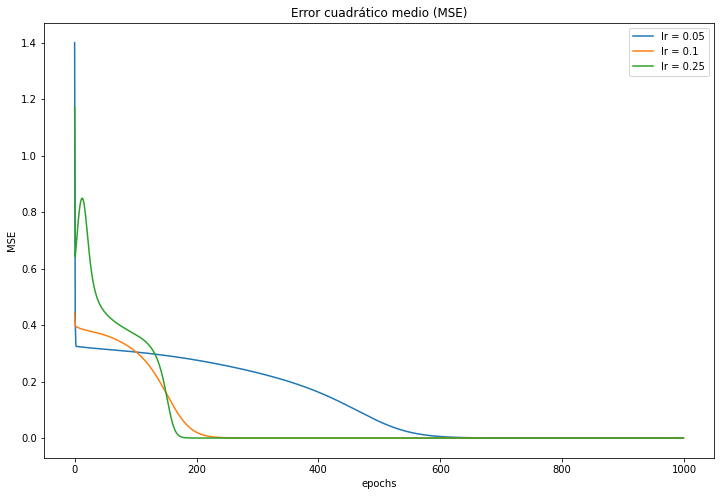

In [79]:
plt.figure(figsize=(12, 8))
for i in range(cont):
  plt.plot(MSE[:,i], label = 'lr = ' + str(learning_rate[i]))
  plt.legend()
plt.title('Error cuadrático medio (MSE)')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

Se verifica el comportamiento del modelo entrenado con lr = 0.5

X1 |X2 |Y | 
---|---|--|
0  |0  |0 |
0  |1  |1 |
1  |0  |1 |
1  |1  |0 |


In [80]:
print("La salida del modelo es:\n")
for i in range(4):
  (Z11, Z21, A11, A21, Z12) = forward(W, X[i])
  print(round(Z12, 3))

La salida del modelo es:

0.0
1.0
1.0
0.0
